In [22]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('auto-mpg.csv')

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
dataset.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
dataset.shape

(398, 9)

In [6]:
dataset.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
dataset.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [8]:
dataset.corr()


ValueError: could not convert string to float: '?'

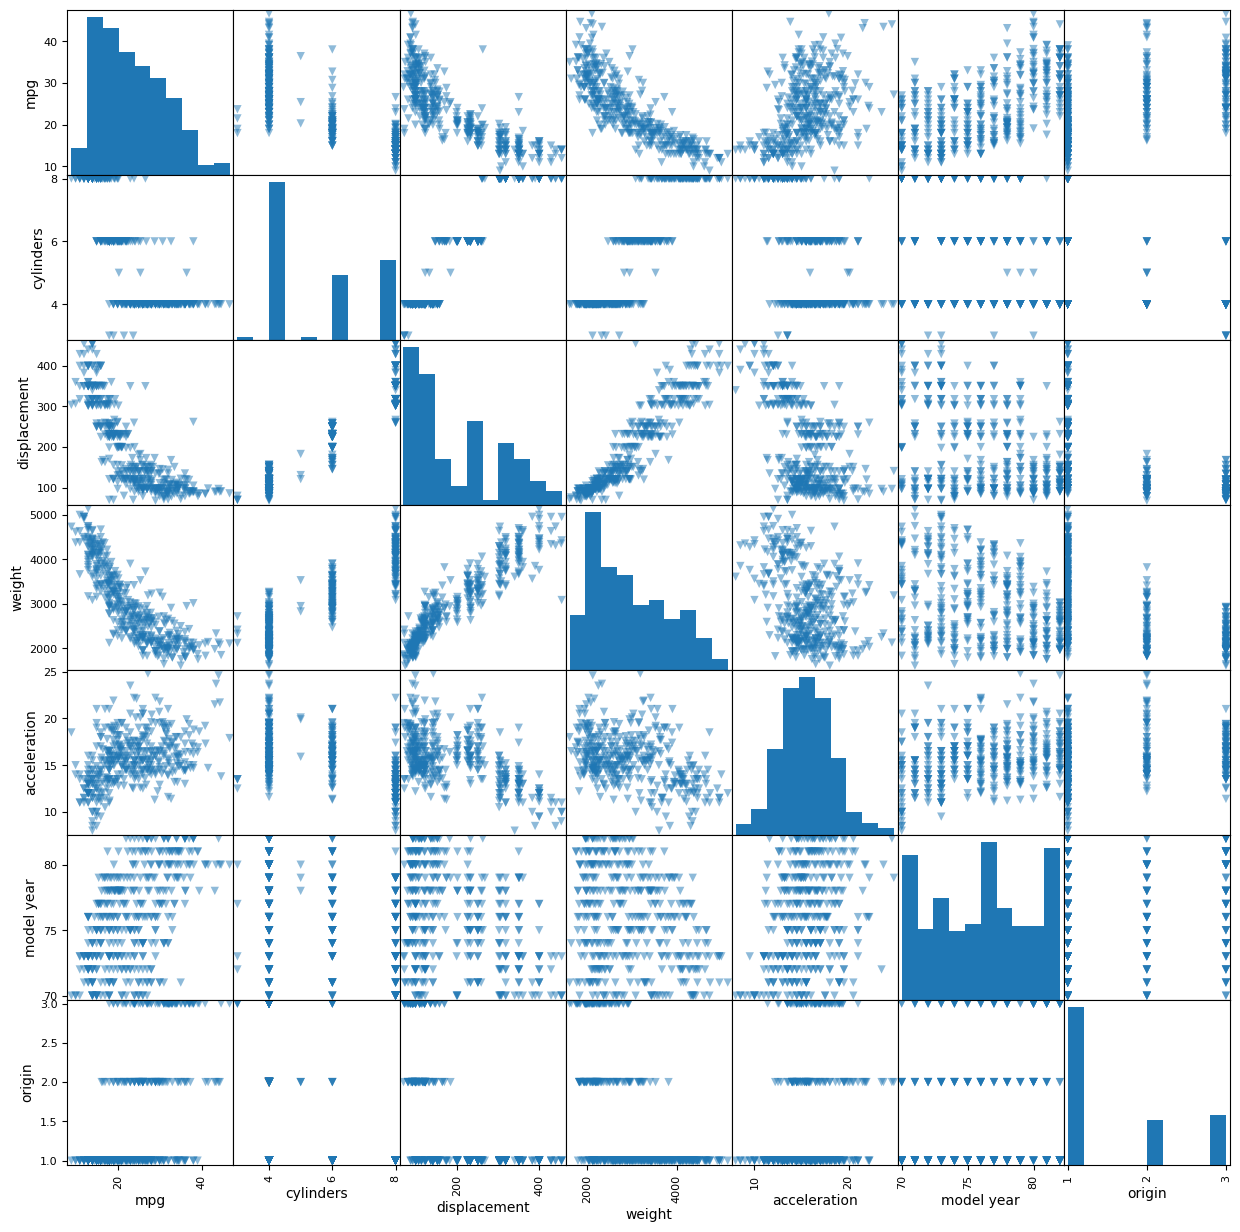

In [9]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(dataset, figsize = [15, 15], marker = 'v', alpha=0.5)
plt.show()


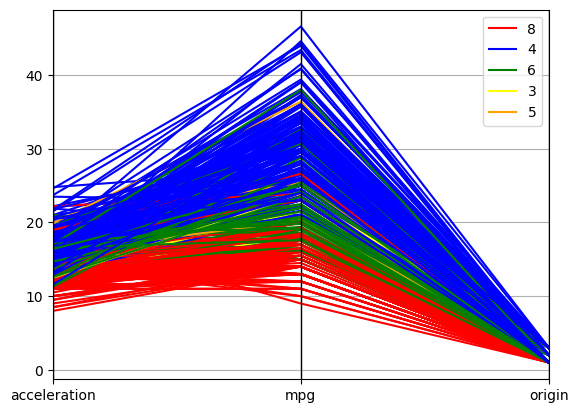

In [10]:
from pandas.plotting import parallel_coordinates
pll = parallel_coordinates(dataset, 'cylinders', cols=['acceleration','mpg', 'origin'], 
 color=('red', 'blue', 'green', 'yellow', 'orange'))
plt.show()


In [12]:
pd.crosstab(dataset['cylinders'], dataset['model year'], rownames=['cylinders'], colnames=['model year'])

model year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinders,,,,,,,,,,,,,
3,0,0,1,1,0,0,0,1,0,0,1,0,0
4,7,13,14,11,15,12,15,14,17,12,25,21,28
5,0,0,0,0,0,0,0,0,1,1,1,0,0
6,4,8,0,8,7,12,10,5,12,6,2,7,3
8,18,7,13,20,5,6,9,8,6,10,0,1,0


In [13]:
dataset = dataset[dataset['horsepower']!='?']

In [14]:
#all rows with ? are gone
dataset[dataset['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [15]:
#finding outliers in 'mpg'
def find_outliers(ds, col):
 quart1 = ds[col].quantile(0.25)
 quart3 = ds[col].quantile(0.75)
 IQR = quart3 - quart1 #Inter-quartile range
 low_val = quart1 - 1.5*IQR
 high_val = quart3 + 1.5*IQR
 ds = ds.loc[(ds[col] < low_val) | (ds[col] > high_val)]
 return ds
dataset = pd.read_csv('auto-mpg.csv')
find_outliers(dataset, 'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


In [16]:
#finding outliers in ''acceleration''
def find_outliers(ds, col):
 quart1 = ds[col].quantile(0.25)
 quart3 = ds[col].quantile(0.75)
 IQR = quart3 - quart1 #Inter-quartile range
 low_val = quart1 - 1.5*IQR
 high_val = quart3 + 1.5*IQR
 ds = ds.loc[(ds[col] < low_val) | (ds[col] > high_val)]
 return ds
dataset = pd.read_csv('auto-mpg.csv')
find_outliers(dataset, 'acceleration')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


In [17]:
def remove_outliers(ds, col):
 quart1 = ds[col].quantile(0.25)
 quart3 = ds[col].quantile(0.75)
 IQR = quart3 - quart1 #Interquartile range
 low_val = quart1 - 1.5*IQR
 print(low_val)
 high_val = quart3 + 1.5*IQR
 print(high_val)
 df_out = ds.loc[(ds[col] >= low_val) & (ds[col] <= high_val)]
 return df_out
new_data = remove_outliers(dataset, 'acceleration')


8.8
22.2


In [18]:
#outliers removed from new_data
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    object 
 4   weight        391 non-null    int64  
 5   acceleration  391 non-null    float64
 6   model year    391 non-null    int64  
 7   origin        391 non-null    int64  
 8   car name      391 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.5+ KB


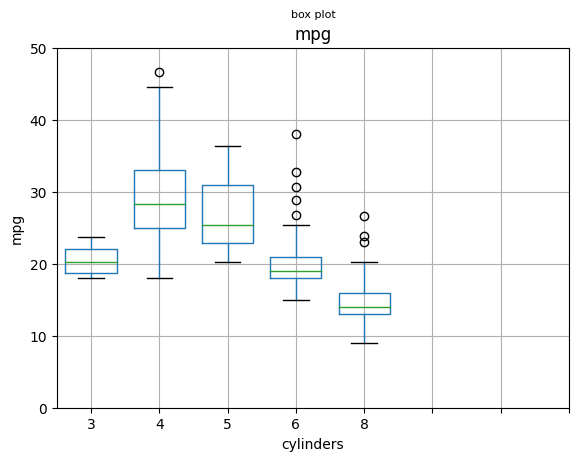

In [21]:
# create a new figure and axis object
fig, ax = plt.subplots()
# plot a boxplot of the 'value' column grouped by the 'category' column
dataset.boxplot(column=["mpg"],by="cylinders",ax=ax,widths=0.75, notch=False)
ax.set_xticks([1,2,3, 4, 5, 6, 7, 8])
ax.set_yticks([0, 10, 20, 30, 40, 50])
plt.xlabel("cylinders")
plt.ylabel("mpg")
fig.suptitle("box plot",fontsize=8)
plt.show()

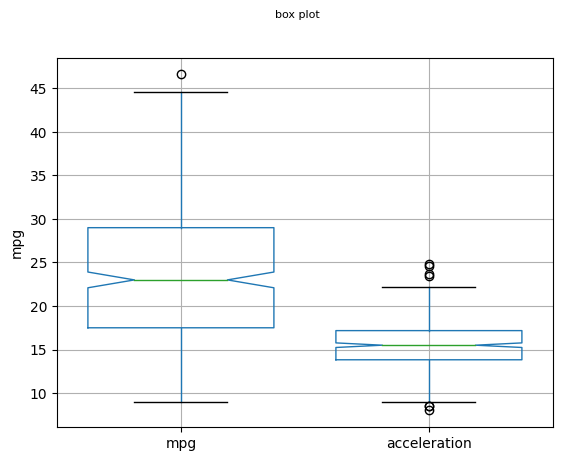

In [24]:
# create a new figure and axis object
fig, ax = plt.subplots()
# plot a boxplot of the 'value' column grouped by the 'category' column
dataset.boxplot(column=["mpg","acceleration"],widths=0.75, notch=True,ax=ax)
#ax.set_xticks([1,2,3, 4, 5, 6, 7, 8])
#ax.set_yticks([0, 10, 20, 30, 40, 50])
#plt.xlabel("cylinders")
plt.ylabel("mpg")
fig.suptitle("box plot",fontsize=8)
plt.show()


In [25]:
print(dataset["mpg"].describe())
print(dataset["acceleration"].describe())

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64


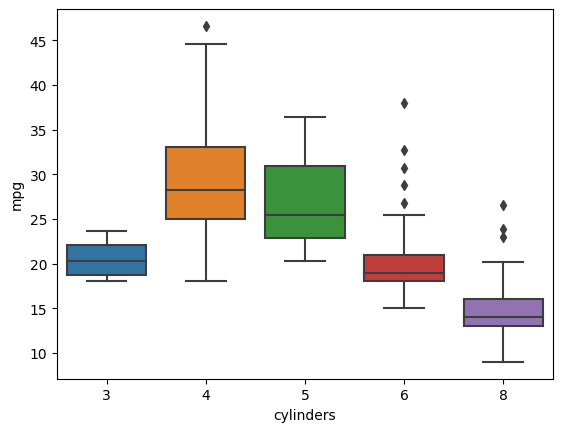

In [27]:
import seaborn as sns
sns.boxplot(x=dataset["cylinders"],y=dataset["mpg"],data=dataset)
plt.show()


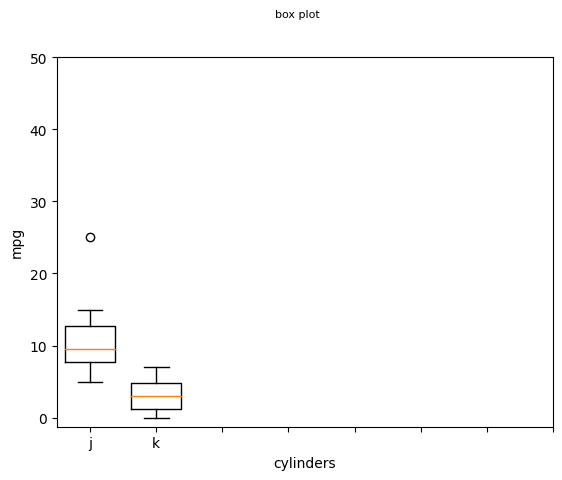

In [28]:
# create a new figure and axis object
fig, ax = plt.subplots()
l=[[5,7,8,9,10,12,15,25],[4,7,2,1,5,0]]
# plot a boxplot of the 'value' column grouped by the 'category' column
ax.boxplot(l,widths=0.75, notch=False,labels=["j","k"])
ax.set_xticks([1,2,3, 4, 5, 6, 7, 8])
ax.set_yticks([0, 10, 20, 30, 40, 50])
plt.xlabel("cylinders")
plt.ylabel("mpg")
fig.suptitle("box plot",fontsize=8)
plt.show()


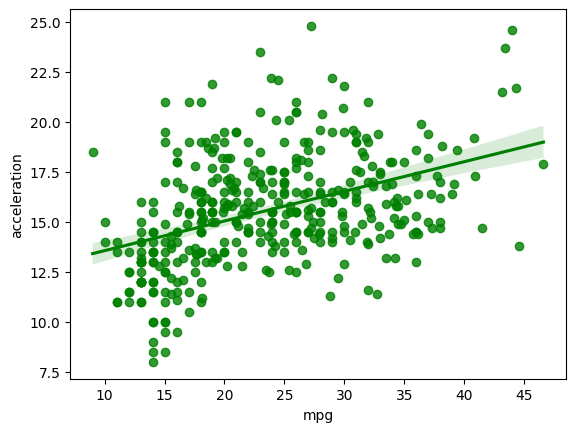

In [29]:
sns.regplot(x='mpg', y='acceleration', data = dataset, color='green')
plt.show()

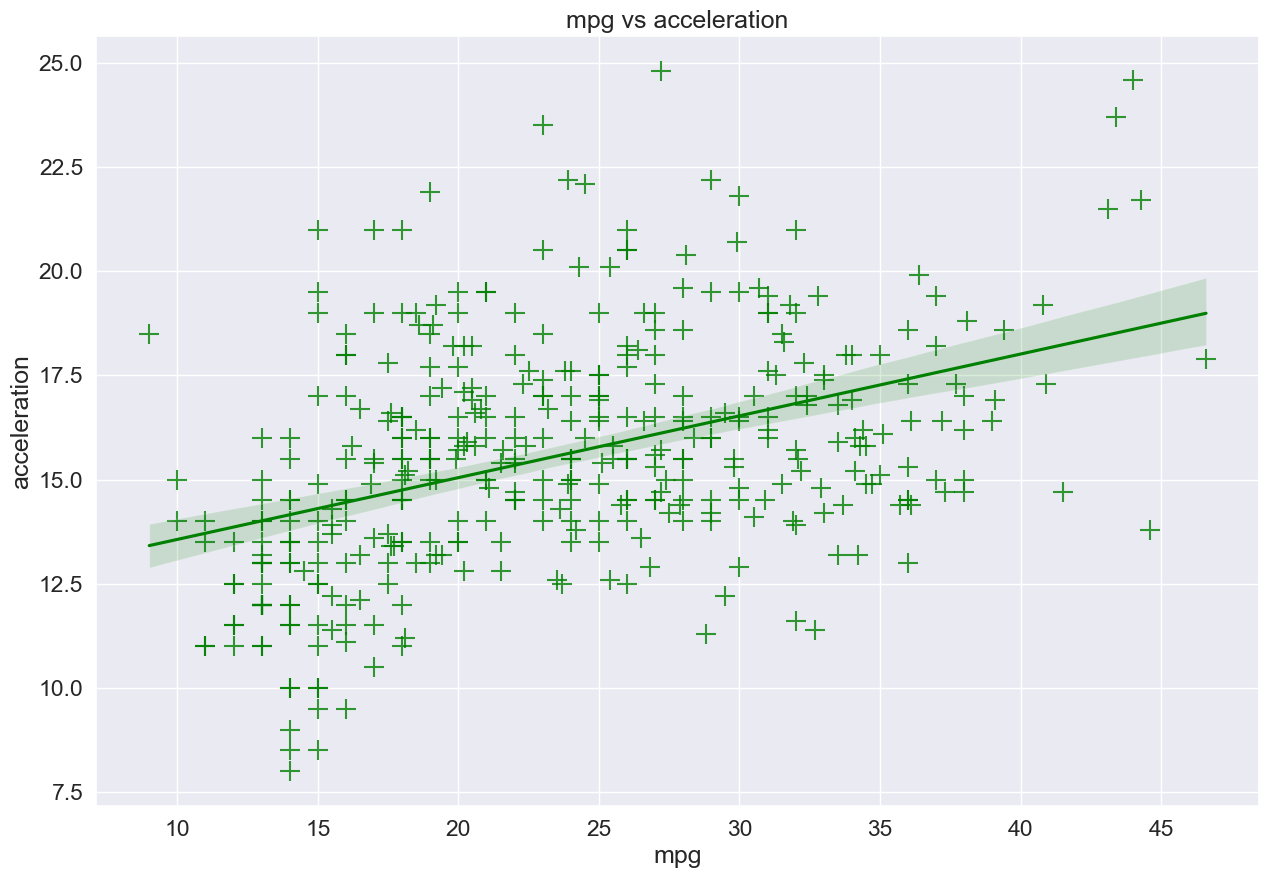

In [32]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='mpg', y='acceleration', data = dataset,
 color='green', marker = '+',
 scatter_kws={'s': 200})
ax.set(xlabel='mpg', ylabel='acceleration') # add x- and y-labels
ax.set_title('mpg vs acceleration') # add title
plt.show()


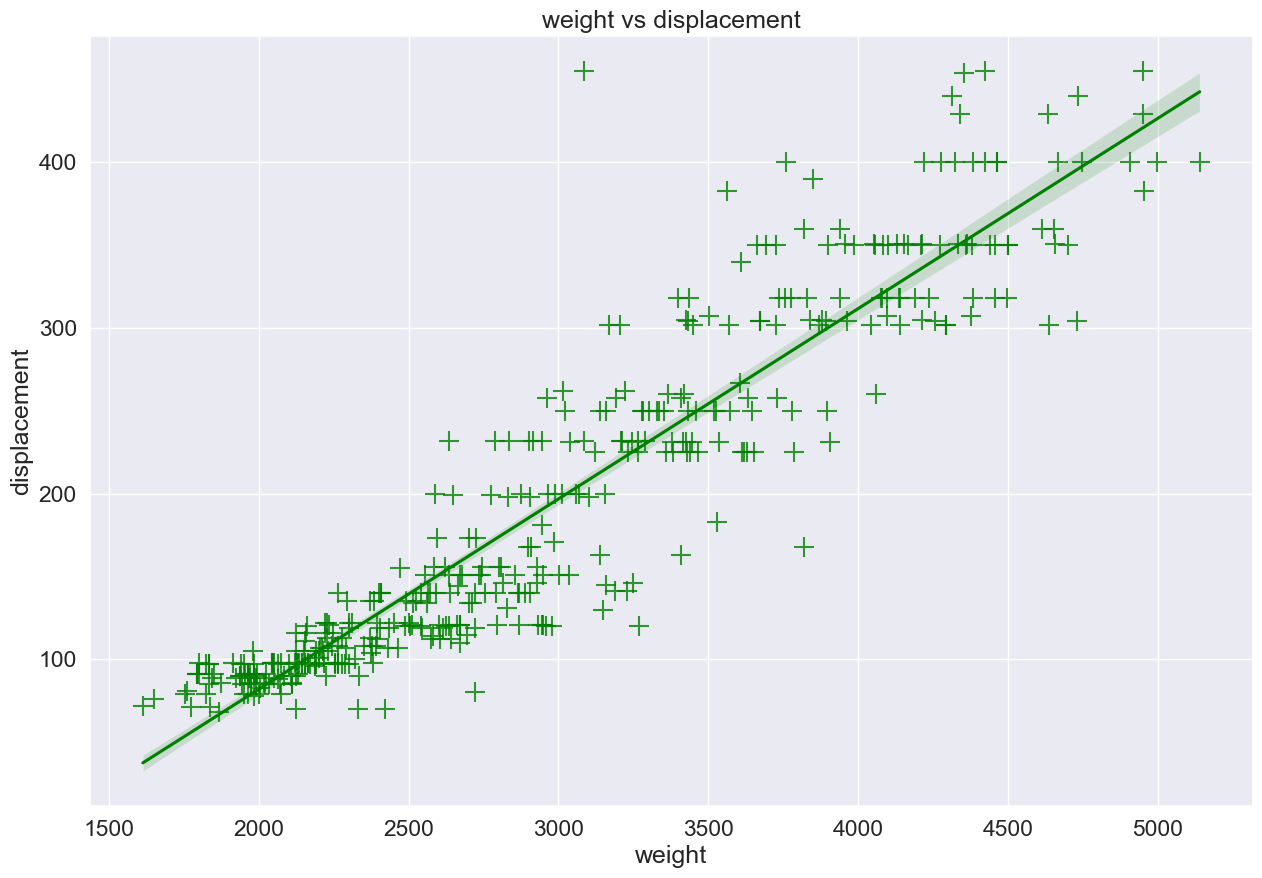

In [33]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='weight', y='displacement',
 data = dataset, color='green', marker = '+', 
 scatter_kws={'s': 200})
ax.set(xlabel='weight', ylabel='displacement') # add x- and y-labels
ax.set_title('weight vs displacement') # add title
plt.show()
